In [30]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
BASE_URL = "https://api.qtcq.xyz/api/v1/market-data/bars" 
API_KEY = "ACXQ1YKFUybJNcX69pyZ3X2UZBQMcieWnvC2MUf5T0E" 

In [35]:
symbol_gold = "GLD"
symbol_silver = "SLV"

In [101]:
params_gold = {
    "symbols": symbol_gold,
    "start": "2025-10-02T09:30:00",
    "end": "2025-11-01T16:00:00",
    "key": API_KEY
}

response = requests.get(BASE_URL, params = params_gold)
response.raise_for_status() 
data_gold = response.json()
df_gold = pd.DataFrame(data_gold['bars'])
print(df_gold)

# Note: -04:00 at the end of the timestep is the timezone info for EDT


                      timestamp    open    high       low   close  volume
0     2025-10-10T04:00:00-04:00  365.53  365.53  365.4400  365.49  1580.0
1     2025-10-10T04:01:00-04:00  365.55  365.55  365.5400  365.54  1258.0
2     2025-10-10T04:02:00-04:00  365.73  365.73  365.7300  365.73   902.0
3     2025-10-10T04:03:00-04:00  365.99  365.99  365.9900  365.99   593.0
4     2025-10-10T04:04:00-04:00  366.00  366.17  366.0000  366.17  1553.0
...                         ...     ...     ...       ...     ...     ...
9995  2025-10-09T19:02:00-04:00  365.89  365.89  365.8900  365.89   236.0
9996  2025-10-09T19:03:00-04:00  365.88  365.89  365.8784  365.89   837.0
9997  2025-10-09T19:04:00-04:00  365.85  365.85  365.8500  365.85   209.0
9998  2025-10-09T19:05:00-04:00  365.89  365.89  365.7500  365.75   549.0
9999  2025-10-09T19:06:00-04:00  365.78  365.78  365.7800  365.78   257.0

[10000 rows x 6 columns]


In [102]:
# Display all rows for the 'timestamp' column
print(df_gold['timestamp'].iloc[:1500])

0       2025-10-10T04:00:00-04:00
1       2025-10-10T04:01:00-04:00
2       2025-10-10T04:02:00-04:00
3       2025-10-10T04:03:00-04:00
4       2025-10-10T04:04:00-04:00
                  ...            
1495    2025-10-14T17:32:00-04:00
1496    2025-10-14T17:33:00-04:00
1497    2025-10-14T17:36:00-04:00
1498    2025-10-14T17:37:00-04:00
1499    2025-10-14T17:41:00-04:00
Name: timestamp, Length: 1500, dtype: object


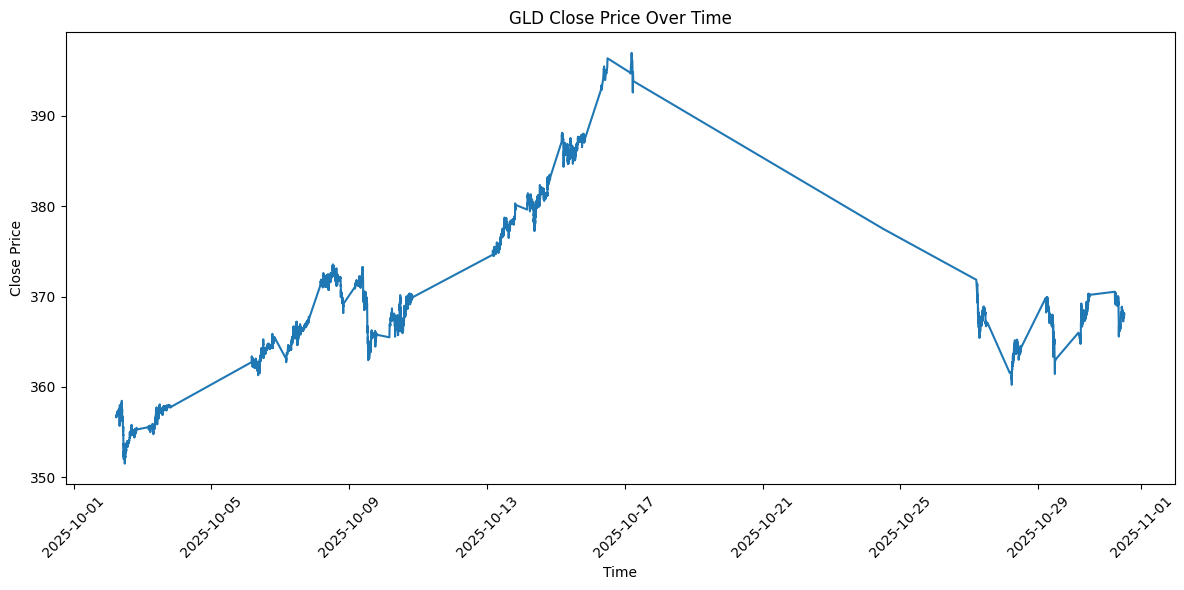

In [105]:
# Convert the 'timestamp' column to pandas datetime
# Need to convert time to chronological order (otherwise goes 01-10-11...-02)
df_gold = df_gold.sort_values('timestamp')
df_gold['timestamp'] = pd.to_datetime(df_gold['timestamp'])
df_gold = df_gold.drop_duplicates(subset='timestamp')
# Plot with timestamp on the x-axis
plt.figure(figsize=(12, 6))
plt.plot(df_gold['timestamp'], df_gold['close'])
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('GLD Close Price Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

Observations:
1. Can only load data after 2022
2. Can only load data for maximum 31 days
3. There are periods (other than weekend) that has no price quotation

For now --> test strategy on yfinance first

In [3]:
# TEST
url = "https://api.qtcq.xyz/api/v1/market-data/symbols" # Change this
response = requests.get(url)

print(response.json())
print(len(response.json()["symbols"]))

{'symbols': ['A', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APO', 'APP', 'APTV', 'ARE', 'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBY', 'BDX', 'BEN', 'BF.B', 'BG', 'BIIB', 'BK', 'BKNG', 'BKR', 'BLDR', 'BLK', 'BMY', 'BR', 'BRK.B', 'BRO', 'BSX', 'BX', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CEG', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COIN', 'COO', 'COP', 'COR', 'COST', 'CPAY', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CRWD', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTRA', 'CTSH', 'CTVA', 'CVS', 'CVX', 'D', 'DAL', 'DASH', 'DAY', 'DD', 'DDOG', 'DE', 'DECK', 'DELL', 'DG', 'DGX', 'DHI', 'DHR', 'DIS'